# Exploratory Data Analysis: Residential Energy Panel Data

This notebook performs a comprehensive exploratory data analysis (EDA) on the `residential_panel_data.csv` dataset. The goal is to understand energy consumption trends, the impact of climate (HDD/CDD), and economic factors.

## 1. Setup and Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Data Loading and Initial Inspection

In [ ]:
df = pd.read_csv('./../data/integrated-data/residential_panel_data.csv')

display(df.head())

,Year,End_Use,Fuel_Technology,Energy_ktoe,Population,Households,Inhabitants per household,HDD,CDD,GDP,Expenditure
0,2000,Cooking,Biomass and wastes,0.000,82163475.0,38136234.0,2.154,2803.0,8.0,2358694.0,1379742.0
1,2000,Cooking,Electricity,1430.199,82163475.0,38136234.0,2.154,2803.0,8.0,2358694.0,1379742.0
2,2000,Cooking,Gases incl. biogas,1575.000,82163475.0,38136234.0,2.154,2803.0,8.0,2358694.0,1379742.0
3,2000,Cooking,Liquified petroleum gas (LPG),586.700,82163475.0,38136234.0,2.154,2803.0,8.0,2358694.0,1379742.0
4,2000,Cooking,Solids,0.000,82163475.0,38136234.0,2.154,2803.0,8.0,2358694.0,1379742.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       400 non-null    int64  
 1   End_Use                    400 non-null    object 
 2   Fuel_Technology            400 non-null    object 
 3   Energy_ktoe                400 non-null    float64
 4   Population                 400 non-null    float64
 5   Households                 400 non-null    float64
 6   Inhabitants per household  400 non-null    float64
 7   HDD                        400 non-null    float64
 8   CDD                        400 non-null    float64
 9   GDP                        400 non-null    float64
 10  Expenditure                400 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 34.5+ KB


In [ ]:
display(df.describe())

,Year,Energy_ktoe,Population,Households,Inhabitants per household,HDD,CDD,GDP,Expenditure
count,400.000000,400.000000,4.000000e+02,4.000000e+02,400.000000,400.000000,400.000000,4.000000e+02,4.000000e+02
mean,2007.500000,2162.839757,8.176541e+07,3.943763e+07,2.074187,3049.000000,19.750000,2.549426e+06,1.440878e+06
std,4.615545,4238.780007,8.266381e+05,7.272171e+05,0.053294,220.210938,16.181536,1.421098e+05,4.453446e+04
min,2000.000000,0.000000,8.022206e+07,3.813623e+07,2.002000,2661.000000,4.000000,2.358694e+06,1.379742e+06
25%,2003.750000,101.707500,8.109002e+07,3.882782e+07,2.021250,2899.750000,9.750000,2.406820e+06,1.402992e+06
50%,2007.500000,584.150000,8.219066e+07,3.966354e+07,2.067000,3051.000000,12.000000,2.548192e+06,1.434486e+06
75%,2011.250000,1792.500000,8.243857e+07,4.001239e+07,2.125750,3142.000000,29.000000,2.677791e+06,1.470712e+06
max,2015.000000,20340.000000,8.253668e+07,4.055821e+07,2.154000,3630.000000,56.000000,2.800922e+06,1.534790e+06


In [ ]:
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

Missing Values per Column:
Series([], dtype: int64)


## 3. Univariate Analysis

### 3.1 Distribution of Energy Consumption
Analyzing the distribution of the target variable `Energy_ktoe`.

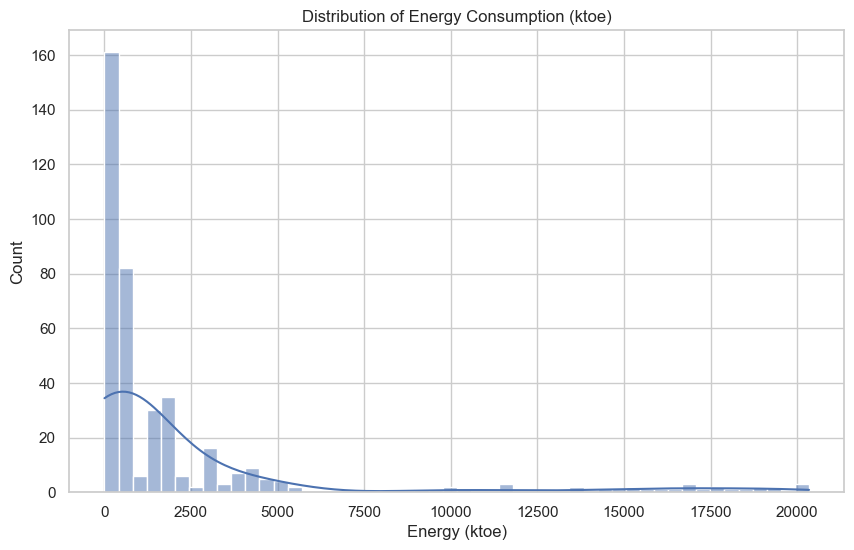

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Energy_ktoe'], bins=50, kde=True)
plt.title('Distribution of Energy Consumption (ktoe)')
plt.xlabel('Energy (ktoe)')
plt.show()

### 3.2 Categorical Feature Counts
Checking the frequency of different End Uses and Fuel Technologies.

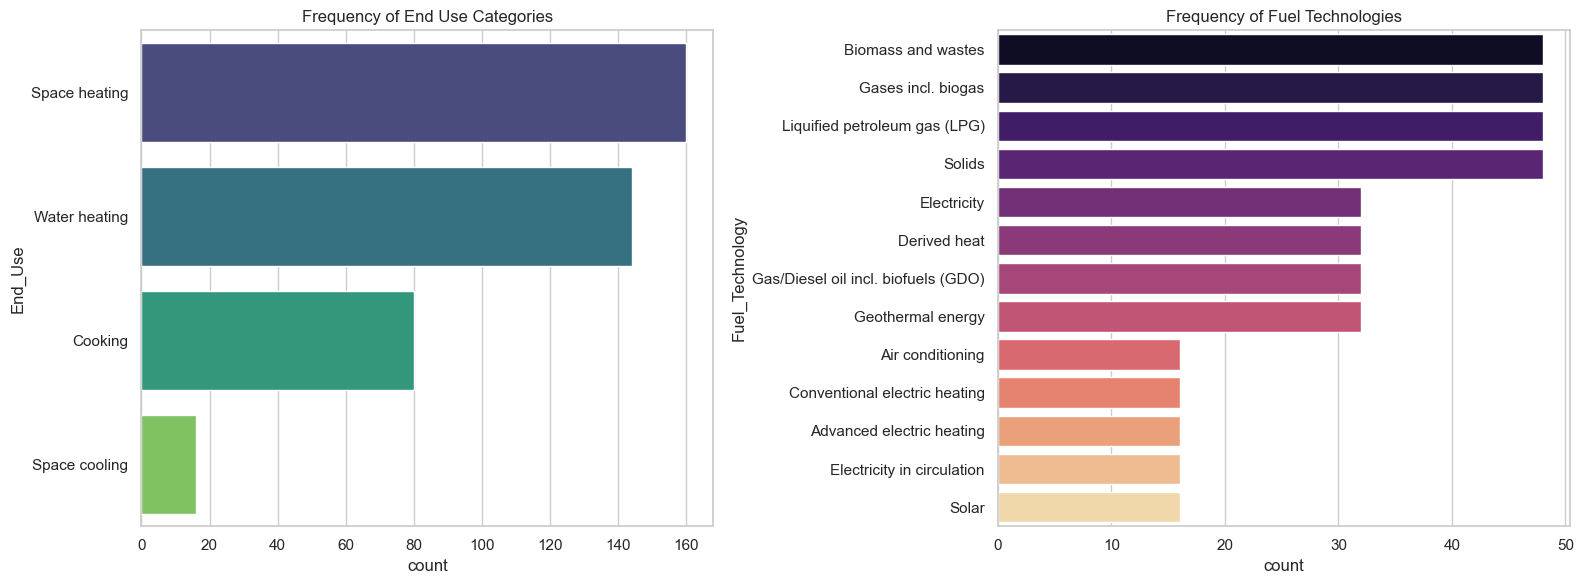

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(y='End_Use', data=df, order=df['End_Use'].value_counts().index, ax=axes[0], palette='viridis')
axes[0].set_title('Frequency of End Use Categories')

sns.countplot(y='Fuel_Technology', data=df, order=df['Fuel_Technology'].value_counts().index, ax=axes[1], palette='magma')
axes[1].set_title('Frequency of Fuel Technologies')

plt.tight_layout()
plt.show()

## 4. Temporal Analysis (Time Series)

### 4.1 Total Energy Consumption Over Years

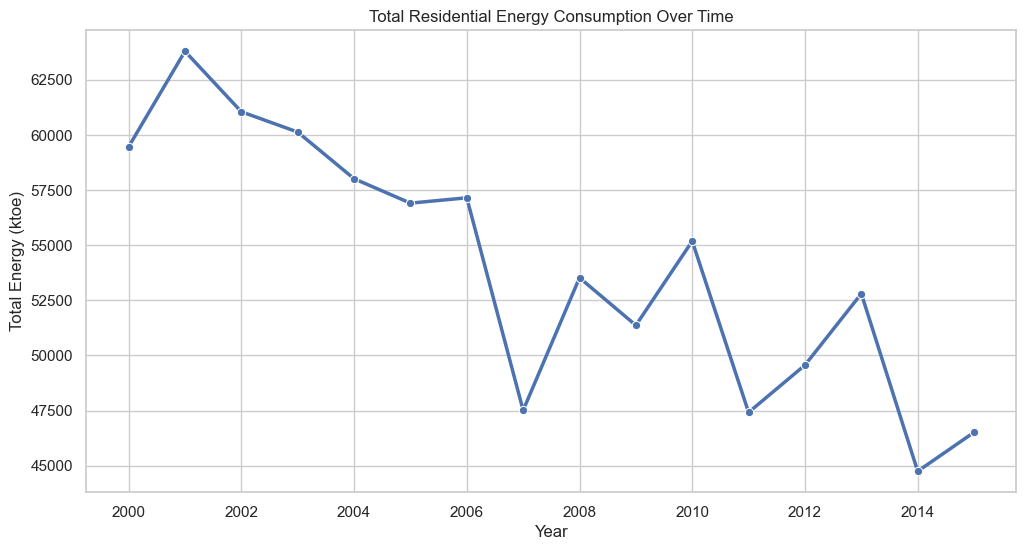

In [ ]:
yearly_energy = df.groupby('Year')['Energy_ktoe'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_energy, x='Year', y='Energy_ktoe', marker='o', linewidth=2.5)
plt.title('Total Residential Energy Consumption Over Time')
plt.ylabel('Total Energy (ktoe)')
plt.grid(True)
plt.show()

### 4.2 Energy Consumption by End Use Over Time

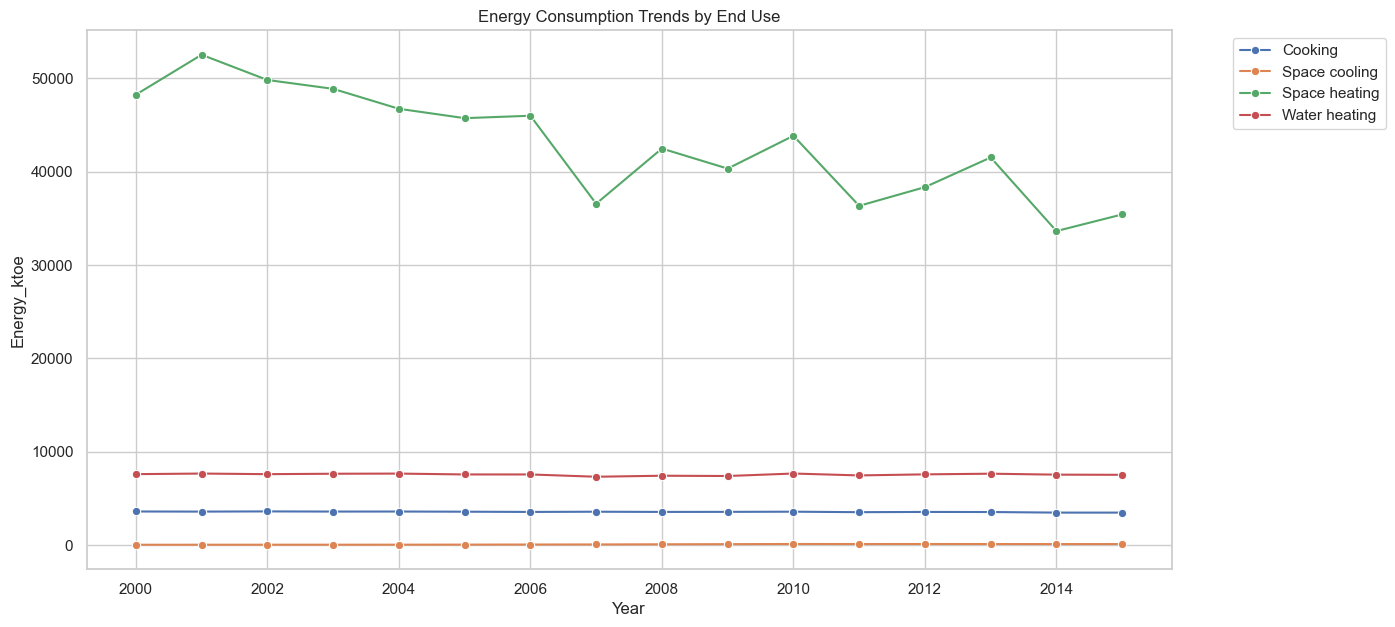

In [9]:
yearly_enduse = df.groupby(['Year', 'End_Use'])['Energy_ktoe'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_enduse, x='Year', y='Energy_ktoe', hue='End_Use', marker='o')
plt.title('Energy Consumption Trends by End Use')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 5. Multivariate Analysis

### 5.1 Energy by Fuel Technology

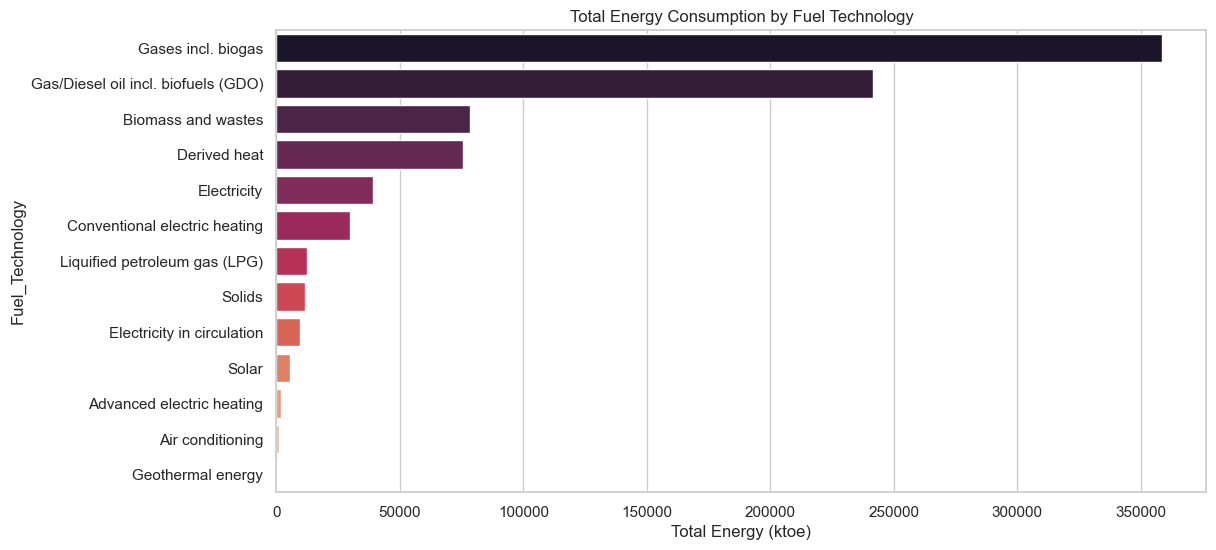

In [ ]:
fuel_energy = df.groupby('Fuel_Technology')['Energy_ktoe'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=fuel_energy, x='Energy_ktoe', y='Fuel_Technology', palette='rocket')
plt.title('Total Energy Consumption by Fuel Technology')
plt.xlabel('Total Energy (ktoe)')
plt.show()

### 5.2 Correlation Heatmap
Investigating correlations between numerical variables (Energy, Demographics, Climate, Economics).

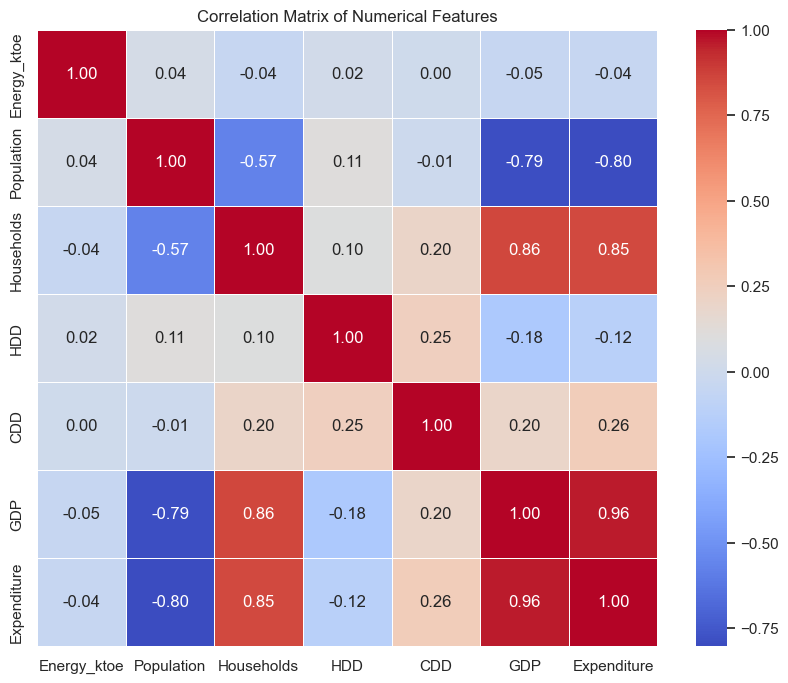

In [ ]:
cols_to_corr = ['Energy_ktoe', 'Population', 'Households', 
                'HDD', 'CDD', 'GDP', 'Expenditure']

corr_matrix = df[cols_to_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### 5.3 Climate Impact: HDD vs Space Heating
Heating Degree Days (HDD) should logically correlate strongly with Space Heating energy consumption.

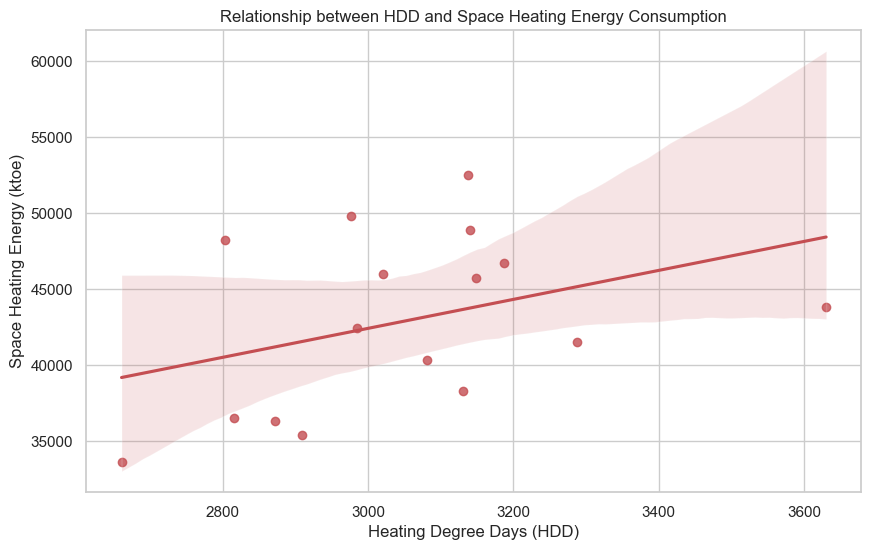

In [ ]:
space_heating_df = df[df['End_Use'] == 'Space heating']

yearly_heating = space_heating_df.groupby('Year')[['Energy_ktoe', 'HDD']].mean() # Taking mean HDD as it is likely constant per year per region, sum Energy

yearly_heating_agg = space_heating_df.groupby('Year').agg({'Energy_ktoe': 'sum', 'HDD': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.regplot(data=yearly_heating_agg, x='HDD', y='Energy_ktoe', color='r')
plt.title('Relationship between HDD and Space Heating Energy Consumption')
plt.xlabel('Heating Degree Days (HDD)')
plt.ylabel('Space Heating Energy (ktoe)')
plt.show()

### 5.4 Economic Impact: GDP vs Total Energy
Does higher GDP correlate with higher energy usage?

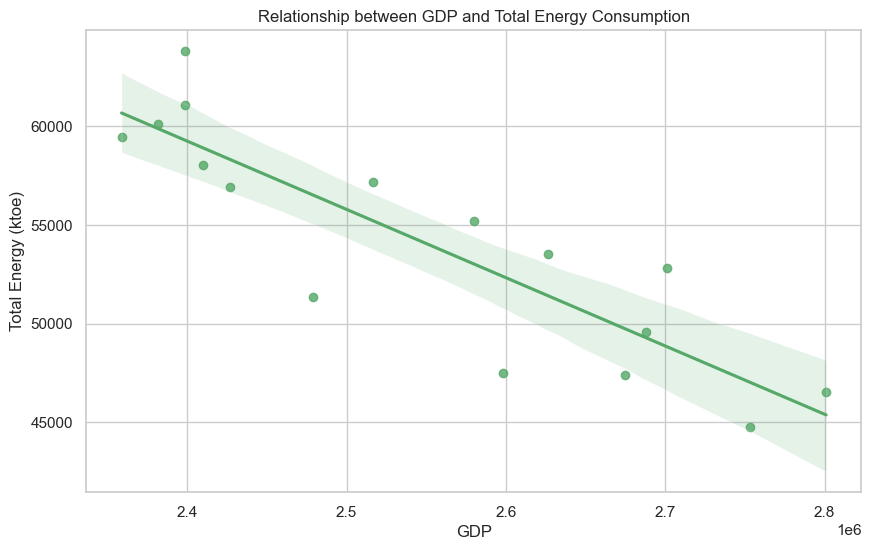

In [13]:
yearly_eco = df.groupby('Year').agg({'Energy_ktoe': 'sum', 'GDP': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.regplot(data=yearly_eco, x='GDP', y='Energy_ktoe', color='g')
plt.title('Relationship between GDP and Total Energy Consumption')
plt.xlabel('GDP')
plt.ylabel('Total Energy (ktoe)')
plt.show()

## 6. Summary of Findings

TODO